# Stats by Year, subdivided by team

### MSP 12.18.2017

How does the clustering of stats work out, and what does it tell us to expect from trades?

In [ ]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl



In [2]:
# imports for scraping

from bs4 import BeautifulSoup
import requests



In [3]:
# the listing of the teams of interest (all!)

teams = ['angels','astros','athletics','bluejays','braves',\
        'brewers','cardinals','cubs','diamondbacks','dodgers',\
        'giants','indians','mariners','marlins','mets','nationals',\
        'orioles','padres','phillies','pirates','rangers',\
        'rays','reds','redsox','rockies','royals','tigers','twins',\
        'whitesox','yankees']

# verify we got all the teams...
print len(teams)

30


In [69]:

TDict = {}
YDict = {}

ydist = np.arange(2007,2018,1)
for year in ydist:

    get_url = 'http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=0&season='+str(year)+'&month=0&season1='+str(year)+'&ind=0&team=0,ts&rost=0&age=0&filter=&players=0'    #get_url = 'http://www.fangraphs.com/teams/'+team#angels'

    r  = requests.get(get_url)

    data = r.text

    soup = BeautifulSoup(data)


    tables = soup.findAll('table')


    # 1: Team 2:G 3:AB 4:PA 5:
    # 6:H 7:1B 8:2B 9:3B 10:HR 11:R 12:RBI 13:BB
    # 14:IBB 15:SO 16:HBP 17:SF 18:SH 19:GDP 20:SB 21:CS 22:AVG

    tnum = 0
    YDict[year] = {}
    YDict[year]['R'] = np.zeros(30)
    YDict[year]['HR'] = np.zeros(30)
    YDict[year]['H'] = np.zeros(30)
    for row in tables[11].find_all("tr")[3:]:

        sav = [td.get_text() for td in row.find_all("td")]
        
        #print sav

        teamname = (sav[1]).replace(' ','').lower()

        TDict[teamname] = {}
        TDict[teamname]['R'] = float(sav[11])
        
        YDict[year]['R'][tnum] = float(sav[10])
        YDict[year]['HR'][tnum] = float(sav[9])
        YDict[year]['H'][tnum] = float(sav[5])
        
        tnum += 1

In [70]:
print YDict[2007]['H']

[ 1656.  1652.  1629.  1578.  1591.  1561.  1543.  1544.  1562.  1558.
  1513.  1529.  1530.  1504.  1500.  1504.  1496.  1460.  1460.  1463.
  1455.  1447.  1457.  1434.  1430.  1415.  1407.  1408.  1350.  1341.]


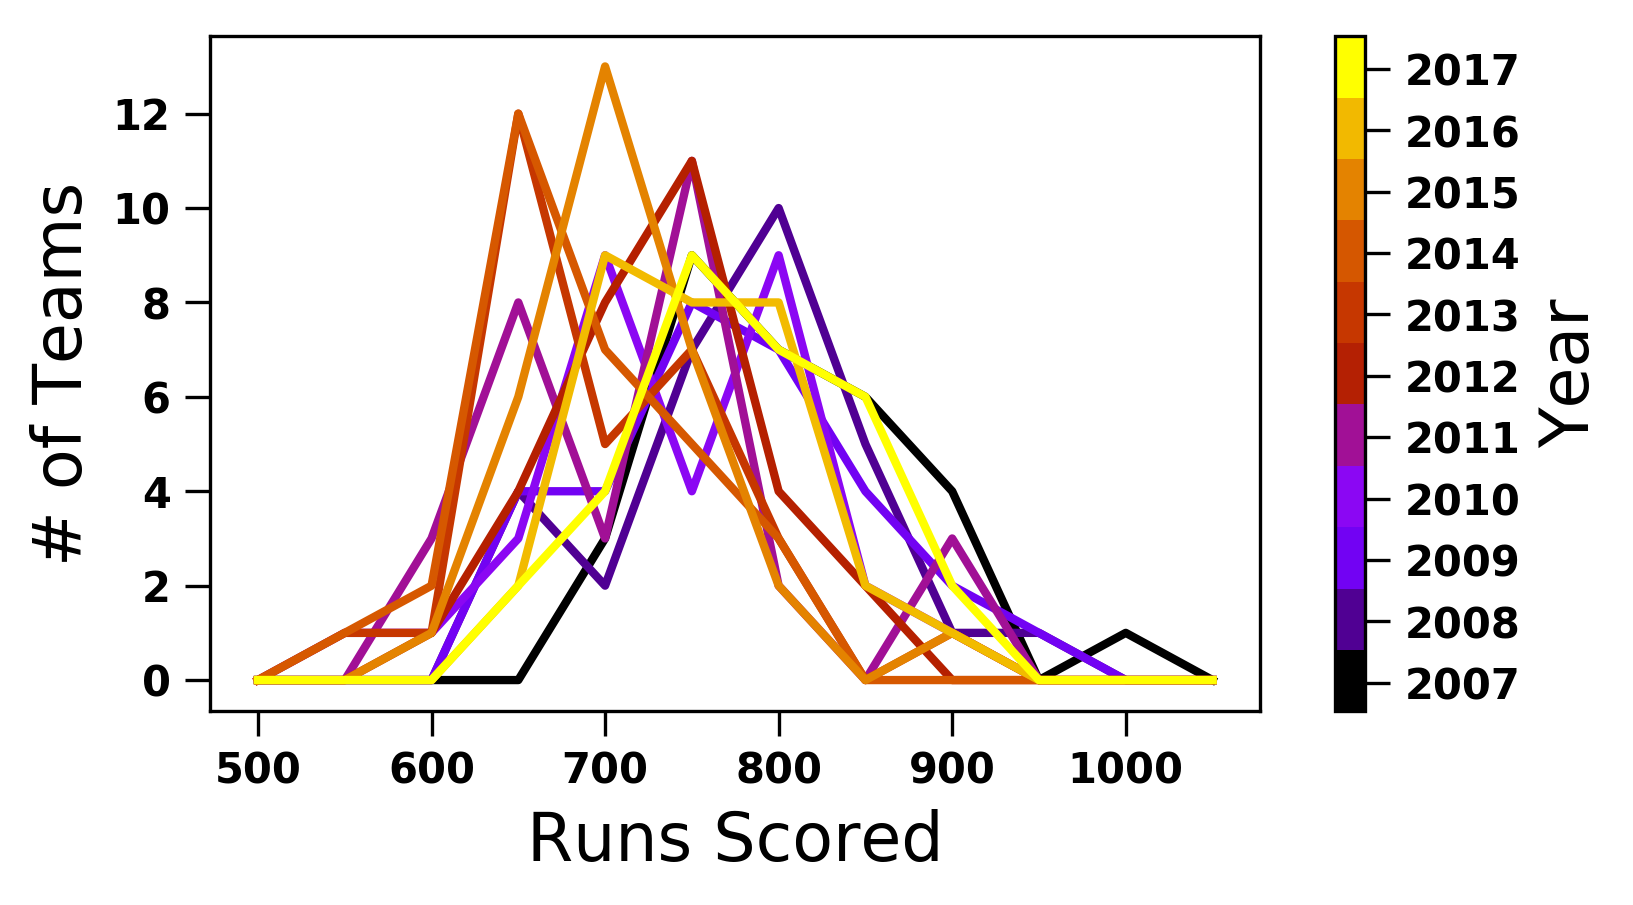

In [76]:

runarr = np.arange(500,1100,50)


fig = plt.figure(figsize=(5,3))

ax1 = fig.add_axes([0.15,0.15,0.7,0.75])

ax4 = fig.add_axes([0.9,0.15,0.02,0.75])

clrs = cm.gnuplot

for year in ydist:
    rundist = np.zeros_like(runarr)
    for val in np.digitize(YDict[year]['R'],runarr): rundist[val] += 1
    
    ax1.plot(runarr,rundist,color=cm.gnuplot((year-float(np.min(ydist)))/(len(ydist)-1),1))
    
    
ax1.set_xlabel('Runs Scored',size=16)
ax1.set_ylabel('# of Teams',size=16)
norm = mpl.colors.BoundaryNorm(boundaries=np.linspace(0,1.,len(ydist)+1.), ncolors=256)
cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=cm.gnuplot,norm=norm)
cb1.set_label('Year',size=16)
cb1.set_ticks(np.linspace(0.,1.,len(ydist)+1.) + 0.5/(len(ydist)+1.))
cb1.set_ticklabels(ydist)

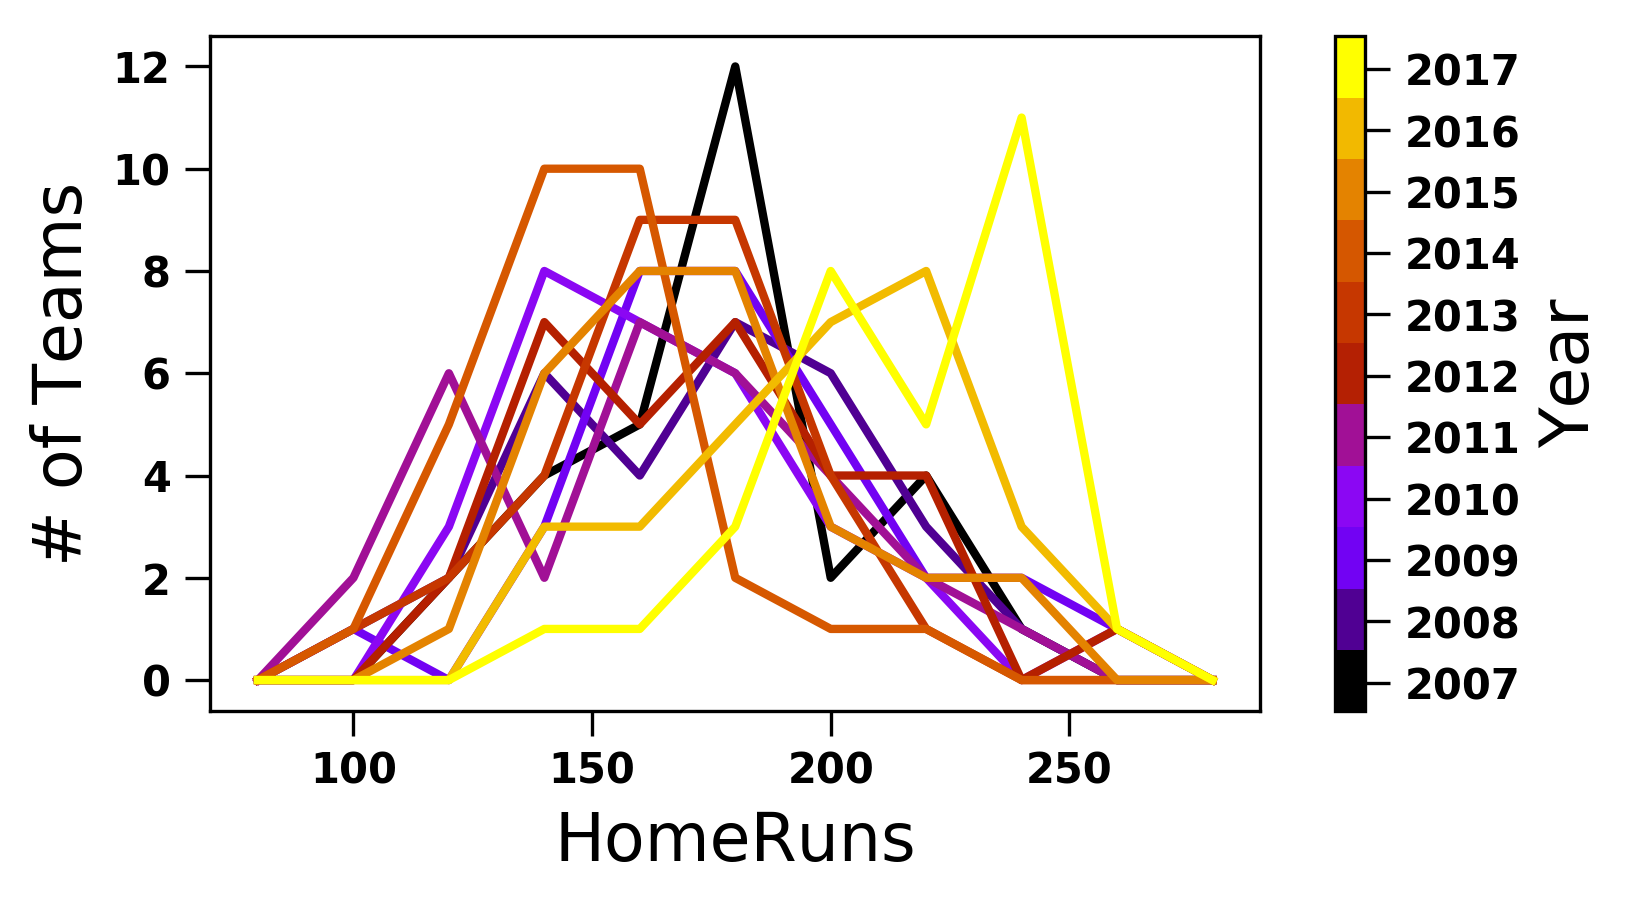

In [74]:

runarr = np.arange(80,300,20)


fig = plt.figure(figsize=(5,3))

ax1 = fig.add_axes([0.15,0.15,0.7,0.75])

ax4 = fig.add_axes([0.9,0.15,0.02,0.75])

clrs = cm.gnuplot

for year in ydist:
    rundist = np.zeros_like(runarr)
    for val in np.digitize(YDict[year]['HR'],runarr): rundist[val] += 1
    
    ax1.plot(runarr,rundist,color=cm.gnuplot((year-float(np.min(ydist)))/(len(ydist)-1),1))
    
    
ax1.set_xlabel('HomeRuns',size=16)
ax1.set_ylabel('# of Teams',size=16)
norm = mpl.colors.BoundaryNorm(boundaries=np.linspace(0,1.,len(ydist)+1.), ncolors=256)
cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=cm.gnuplot,norm=norm)
cb1.set_label('Year',size=16)
cb1.set_ticks(np.linspace(0.,1.,len(ydist)+1.) + 0.5/(len(ydist)+1.))
cb1.set_ticklabels(ydist)

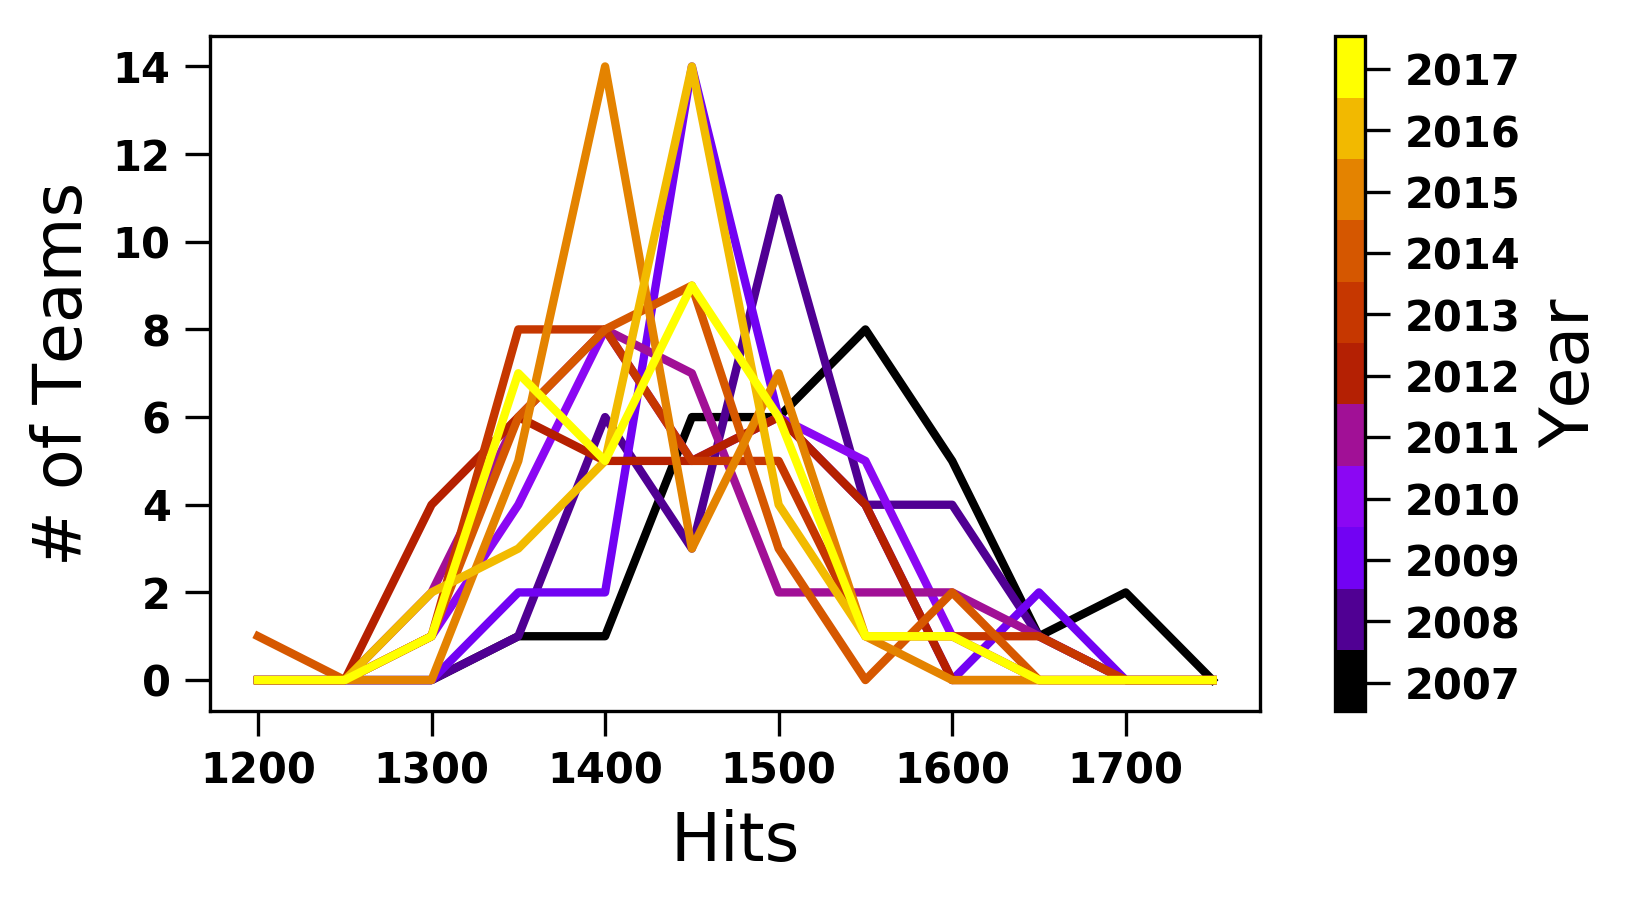

In [78]:

runarr = np.arange(1200,1800,50)


fig = plt.figure(figsize=(5,3))

ax1 = fig.add_axes([0.15,0.15,0.7,0.75])

ax4 = fig.add_axes([0.9,0.15,0.02,0.75])

clrs = cm.gnuplot

for year in ydist:
    rundist = np.zeros_like(runarr)
    for val in np.digitize(YDict[year]['H'],runarr): rundist[val] += 1
    
    ax1.plot(runarr,rundist,color=cm.gnuplot((year-float(np.min(ydist)))/(len(ydist)-1),1))
    
    
ax1.set_xlabel('Hits',size=16)
ax1.set_ylabel('# of Teams',size=16)
norm = mpl.colors.BoundaryNorm(boundaries=np.linspace(0,1.,len(ydist)+1.), ncolors=256)
cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=cm.gnuplot,norm=norm)
cb1.set_label('Year',size=16)
cb1.set_ticks(np.linspace(0.,1.,len(ydist)+1.) + 0.5/(len(ydist)+1.))
cb1.set_ticklabels(ydist)